In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
sns.set_palette('Paired')

In [4]:
#load dataset
df = pd.read_csv('data/cleaned_dataset_1.csv', index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,False
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,"1,889.500",False
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,True
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,"1,840.750",False
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null bool
dtypes: bool(1), float64(2), int64(2), object(15)
memory usage: 1

In [6]:
df.replace({
    'Yes': 1 ,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}, inplace=True)

df['InternetService'] = df['InternetService'].replace(0, 'No internet service')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.850,29.850,False
5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.950,"1,889.500",False
3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.850,108.150,True
7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.300,"1,840.750",False
9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.700,151.650,True


In [7]:
#remove unused column - TotalCharges
df.drop(columns = ['TotalCharges'], inplace = True)

In [8]:
#Make dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,True,1,0,0,1,0,1,0,0,0,0,1,0


In [9]:
#export dummy variables to csv
df_dummies.to_csv('data/cleaned_dataset_2.csv')

In [10]:
#labels
y = df_dummies['Churn']

#features
X = df_dummies.drop(columns=['Churn'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 26) (5634,)
(1409, 26) (1409,)


In [12]:
#Decision Tree Analysis
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=1)

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
y_pred = model.predict(X_test)

pd.Series(y_pred).value_counts()

False    1409
dtype: int64

In [14]:
score = model.score(X_test, y_test)
score

0.7530163236337828

In [15]:
from sklearn import tree
from graphviz import Source

def plottree(decisiontree, features_names = None, class_names = None, out_file = None):
    """Returns a graphviz visualization of a scikit-learn decision tree
    
    Inputs
    - decisiontree: tree to visualize
    - feature_names: iterable with the names of the features present in the data.
    - class_names: iterable with the names of the classes present in the data, in increasing order.
    
    If the call to this function is the last line of a notebook cell, the tree is rendered automatically.
    """
    
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file = out_file, 
        filled = True,
        rounded = True,
        rotate = True,
        feature_names = features_names,
        class_names=class_names
    )
    return Source(dot_data)

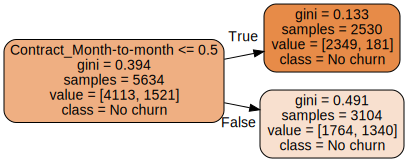

In [16]:
plottree(model, features_names=X_train.columns, class_names=["No churn", "Churn"])

Tree accuracy is 0.6529453513129879


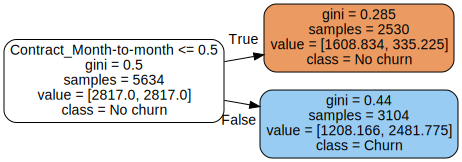

In [17]:
#Breaking up the tree
model = DecisionTreeClassifier(max_depth=1, class_weight='balanced')
model.fit(X_train, y_train)
 
print('Tree accuracy is {}'.format(model.score(X_test, y_test)))

plottree(model, features_names=X_train.columns, class_names=["No churn", "Churn"])

In [19]:
X_train['Contract_Month-to-month'].value_counts()

1    3104
0    2530
Name: Contract_Month-to-month, dtype: int64

In [20]:
#contract_Month-to-month ==1
cont_m2m = X_train[X_train['Contract_Month-to-month'] > .5]
len(cont_m2m)

3104

In [22]:
#Contract_Month-to-month == 0
cont_no_m2m = X_train[X_train['Contract_Month-to-month']<=.5]
len(cont_no_m2m)

2530

Tree accuracy is 0.6529453513129879


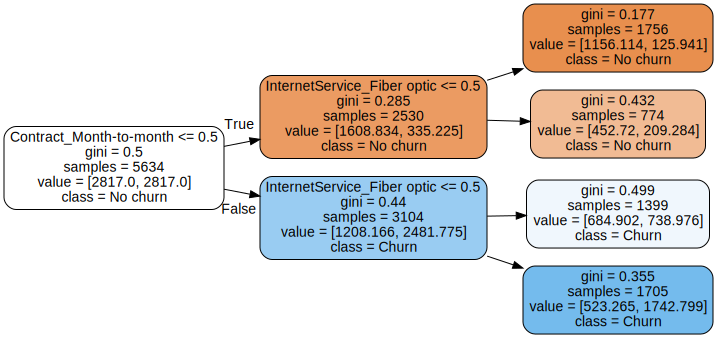

In [26]:
model = DecisionTreeClassifier(max_depth=2, class_weight='balanced')
model.fit(X_train, y_train)

print('Tree accuracy is {}'.format(model.score(X_test,y_test)))
plottree(model, features_names=X_train.columns, class_names=["No churn", "Churn"])

In [29]:
#Contrac_Month-to-month ==1
cont_m2m = X_train[X_train['Contract_Month-to-month'] > .5]
len(cont_m2m)

3104

In [30]:
#Contract_Month-to-month ==1 && InternetService_Fiber-optic ==1
cont_m2m_fiber = cont_m2m[cont_m2m['InternetService_Fiber optic'] > 0.5]
len(cont_m2m_fiber)

1705

In [31]:
#Contract_Month-to-month ==1 && InternetService_Fiber-optic ==0
cont_m2m_no_fiber = cont_m2m[cont_m2m['InternetService_Fiber optic'] <= 0.5]
len(cont_m2m_no_fiber)

1399

Tree accuracy is 0.7444996451383961


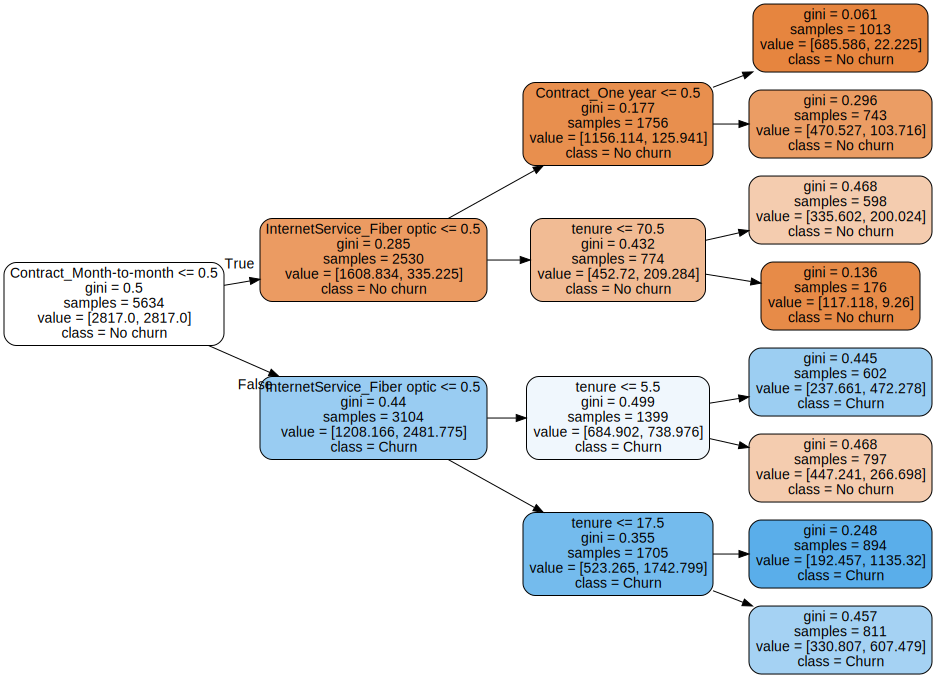

In [33]:
model = DecisionTreeClassifier(max_depth=3, class_weight = 'balanced')
model.fit(X_train, y_train)

print('Tree accuracy is {}'.format(model.score(X_test, y_test)))
plottree(model, features_names=X_train.columns, class_names=["No churn", "Churn"])

In [35]:
#Contract_Month-to_month ==1
cont_m2m = X_train[X_train['Contract_Month-to-month']>0.5]
len(cont_m2m)

3104

In [37]:
#Contract_Month-to_month ==1 && InternetService_Fiber-optic ==1
cont_m2m_fiber = cont_m2m[cont_m2m['Contract_Month-to-month']>0.5]
len(cont_m2m_fiber)

3104

In [40]:
#Contract_Month-to_month ==1 && InternetService_Fiber-optic ==1 && tenure > 14.5
cont_m2m_fiber_high_tenure = cont_m2m_fiber[cont_m2m_fiber['tenure']>14.5]
len(cont_m2m_fiber_high_tenure)

1385

In [41]:
#Contract_Month-to_month ==1 && InternetService_Fiber-optic ==1 && tenure <= 14.5
cont_m2m_fiber_low_tenure = cont_m2m_fiber[cont_m2m_fiber['tenure']<=14.5]
len(cont_m2m_fiber_low_tenure)

1719